In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
file=files.upload()

Saving US Superstore Furniture.csv to US Superstore Furniture.csv


In [ ]:
fur=pd.read_csv('US Superstore Furniture.csv')
print(fur)

      Row ID        Order ID  Order Date  ... Quantity Discount    Profit
0          1  CA-2016-152156   11/8/2016  ...        2     0.00   41.9136
1          2  CA-2016-152156   11/8/2016  ...        3     0.00  219.5820
2          3  US-2015-108966  10/11/2015  ...        5     0.45 -383.0310
3          4  CA-2014-115812    6/9/2014  ...        7     0.00   14.1694
4          5  CA-2014-115812    6/9/2014  ...        9     0.20   85.3092
...      ...             ...         ...  ...      ...      ...       ...
2116    2117  CA-2015-168088   3/19/2015  ...        4     0.32  -67.6704
2117    2118  CA-2016-146374   12/5/2016  ...        1     0.00    6.4320
2118    2119  US-2015-151435    9/6/2015  ...        1     0.00   22.3548
2119    2120  CA-2014-110422   1/21/2014  ...        3     0.20    4.1028
2120    2121  CA-2017-121258   2/26/2017  ...        2     0.00   15.6332

[2121 rows x 20 columns]


In [ ]:
X = fur.iloc[:, [16, 19]].values
print(X)

[[ 261.96     41.9136]
 [ 731.94    219.582 ]
 [ 957.5775 -383.031 ]
 ...
 [  85.98     22.3548]
 [  25.248     4.1028]
 [  91.96     15.6332]]


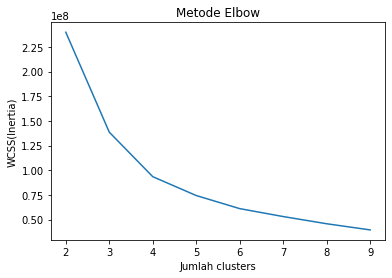

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(2, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS(Inertia)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

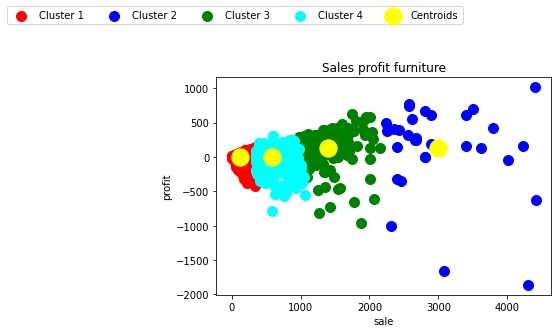

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Sales profit furniture')
plt.xlabel('sale')
plt.ylabel('profit')
plt.legend(bbox_to_anchor =(0.75, 1.35), ncol = 6)

plt.show()